In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
import cv2
from gtts import gTTS
import IPython.display as ipd
import time
import os
import random

In [2]:
train = pd.read_csv('/Users/kangkanpatowary/Desktop/project/mnist_train.csv')
test = pd.read_csv('/Users/kangkanpatowary/Desktop/project/mnist_test.csv')

In [3]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = train['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

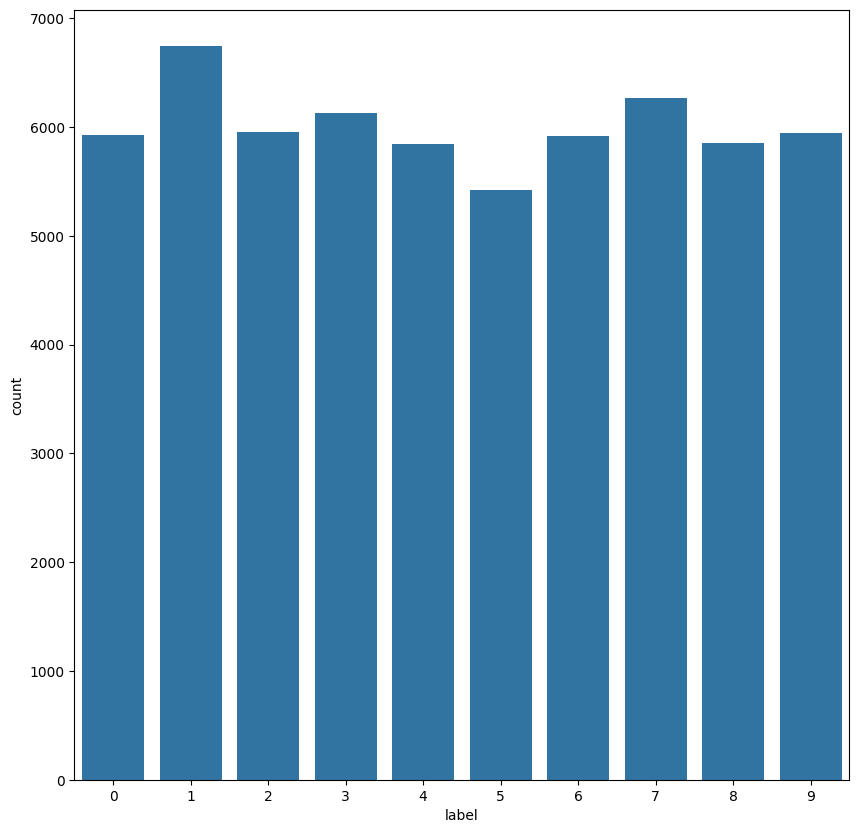

In [6]:
plt.figure(figsize=(10, 10))
sns.countplot(x='label', data=train)
plt.show()


In [7]:
labels = train['label'].values
train.drop('label', axis=1, inplace=True)
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [8]:
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [9]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 0 1 0 0 0 0 0]


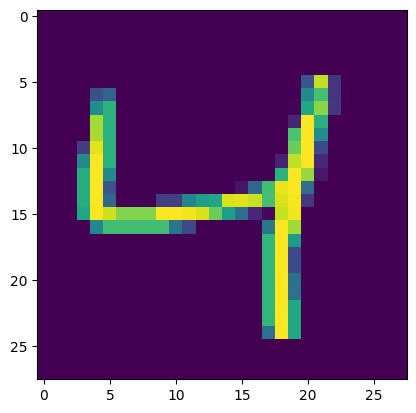

In [10]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28, 28))

In [11]:
for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow('Sample Image', sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [13]:
x_train = X_train / 255.0
x_test = X_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [14]:
batch_size = 128
num_classes = 10
epochs = 10

In [15]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.20),
    Dense(10, activation='softmax')
])

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
375/375 [==============================] - 14s 37ms/step - loss: 0.4279 - accuracy: 0.8694 - val_loss: 0.1281 - val_accuracy: 0.9616
Epoch 2/10
375/375 [==============================] - 14s 36ms/step - loss: 0.1189 - accuracy: 0.9632 - val_loss: 0.0883 - val_accuracy: 0.9716
Epoch 3/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0851 - accuracy: 0.9741 - val_loss: 0.0847 - val_accuracy: 0.9751
Epoch 4/10
375/375 [==============================] - 14s 36ms/step - loss: 0.0684 - accuracy: 0.9790 - val_loss: 0.0794 - val_accuracy: 0.9772
Epoch 5/10
375/375 [==============================] - 14s 36ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0620 - val_accuracy: 0.9804
Epoch 6/10
375/375 [==============================] - 14s 36ms/step - loss: 0.0478 - accuracy: 0.9847 - val_loss: 0.0524 - val_accuracy: 0.9847
Epoch 7/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0717 - val_accuracy:

In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [19]:
model.save('mnist_cnn_model.h5')
print("Model saved as mnist_cnn_model.h5")

Model saved as mnist_cnn_model.h5


/opt/anaconda3/envs/pythonProject14/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


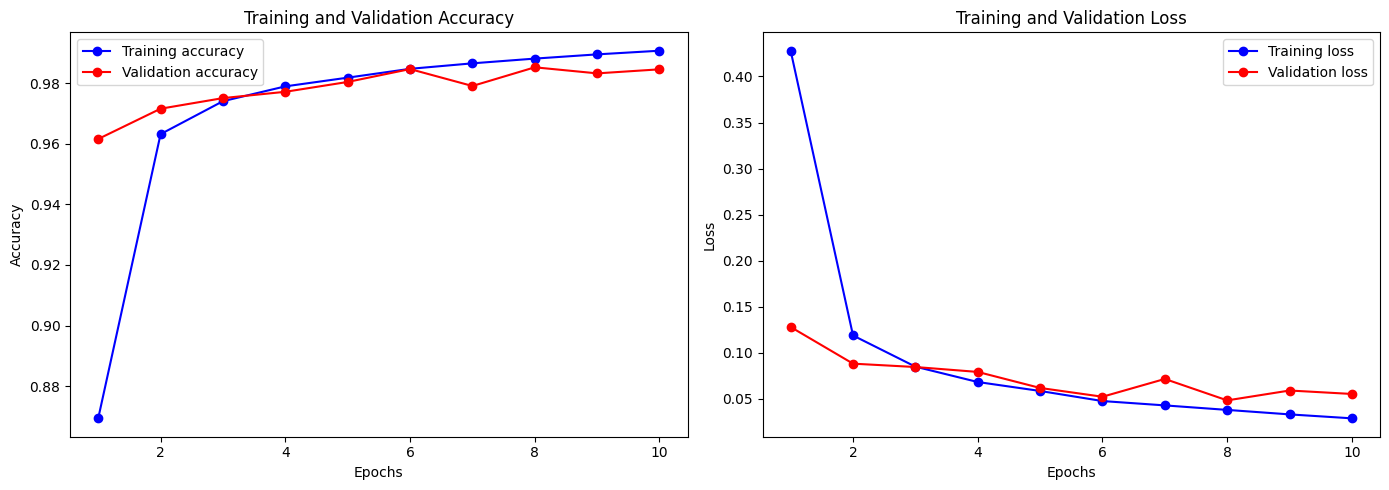

In [20]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)


In [21]:
X_unseen = test.drop('label', axis=1).values
y_unseen = test['label'].values
x_test_unseen = X_unseen / 255.0
x_test_unseen = x_test_unseen.reshape(x_test_unseen.shape[0], 28, 28, 1)

In [22]:
test_labels_binarized = label_binarizer.transform(y_unseen)

In [23]:
y_pred = model.predict(x_test_unseen)
y_pred_labels = np.argmax(y_pred, axis=1)
test_labels_int = np.argmax(test_labels_binarized, axis=1)

313/313 [==============================] - 1s 4ms/step


In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels_int, y_pred_labels)
print(f"Accuracy on unseen data: {accuracy}")


Accuracy on unseen data: 0.9837


In [25]:
def speak(y_pred_labels, y_valid, labels):
    elements = random.sample(range(len(y_pred_labels)), 3)
    pred_labels = [y_pred_labels[idx] for idx in elements]
    true_labels = [y_valid[idx] for idx in elements]

    for i, (pred_label, true_label) in enumerate(zip(pred_labels, true_labels)):
        pred_label_text = labels[pred_label]
        true_label_text = labels[true_label]

        pred_text = f"Predicted Label: {pred_label_text}"
        pred_speech = gTTS(text=pred_text, lang="en", slow=False)
        pred_speech_file = f"predicted_label_{i}.mp3"
        pred_speech.save(pred_speech_file)
        print(pred_text)
        ipd.display(ipd.Audio(pred_speech_file, autoplay=True))
        time.sleep(5)

        true_text = f"True Label: {true_label_text}"
        true_speech = gTTS(text=true_text, lang="en", slow=False)
        true_speech_file = f"true_label_{i}.mp3"
        true_speech.save(true_speech_file)
        print(true_text)
        ipd.display(ipd.Audio(true_speech_file, autoplay=True))
        time.sleep(5)

        os.remove(pred_speech_file)
        os.remove(true_speech_file)

labels = [str(i) for i in range(10)]
speak(y_pred_labels, test_labels_int, labels)

Predicted Label: 5


True Label: 5


Predicted Label: 5


True Label: 5


Predicted Label: 6


True Label: 6


In [29]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Function to get the gesture based on the result
def getGesture(result):
    classLabels = { 
        0: 'Play',
        1: 'Pause',
        2: 'Stop'
    }
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Unknown"

# Load the pre-trained model
model = load_model('mnist_cnn_model.h5')  # Load your custom-trained model

# Initialize video capture from webcam
cap = cv2.VideoCapture(1)

# Initialize playback state
playing = True
paused = False

# Initialize face detection cascade (adjust path to your cascade file)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        print("No frame captured.")
        break

    # Detect faces in the frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract ROI for gesture recognition
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)
        roi_input = roi_resized.reshape(1, 28, 28, 1) / 255.0  # Normalize

        # Predict gesture
        result = np.argmax(model.predict(roi_input), axis=-1)[0]
        gesture = getGesture(result)

        # Control video playback based on gesture
        if gesture == 'Stop':
            playing = False
            paused = False
        elif gesture == 'Pause':
            paused = True
        elif gesture == 'Play':
            playing = True
            paused = False

        # Display feedback on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, gesture, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display video feed with overlays
    if paused:
        paused_text = np.zeros_like(frame)
        cv2.putText(paused_text, 'Paused', (100, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 0, 255), 2)
        cv2.imshow('Frame', paused_text)
    else:
        cv2.imshow('Frame', frame)

    # Exit on pressing the 'Enter' key
    if cv2.waitKey(1) & 0xFF == 13:
        break

cap.release()
cv2.destroyAllWindows()


     
   

1/1 [==============================] - 0s 16ms/step


: 

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from moviepy.editor import VideoFileClip
import moviepy.video.io.ffmpeg_tools as ffmpeg_tools
import time

# Load your gesture recognition model
model = load_model('mnist_cnn_model.h5')

# Function to get the letter/gesture based on the result
def getLetter(result):
    classLabels = {
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
        5: 'F',
        6: 'G',
        7: 'H',
        8: 'I',
        9: 'Stop'  # Assuming 9 is the "stop" gesture
    }
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

# Initialize video capture for the camera
cap = cv2.VideoCapture(0)

# Initialize playback state
playing = True
pause_time = 0

# Function to toggle video playback
def toggle_playback():
    global playing, pause_time
    if playing:
        playing = False
        pause_time = time.time()
    else:
        playing = True

# Load the video clip
clip = VideoFileClip("/Users/kangkanpatowary/Downloads/13302178-hd_1920_1080_30fps.mp4")
video_duration = clip.duration

# Function to play video
def play_video():
    global pause_time
    start_time = pause_time if pause_time else time.time()
    while playing:
        current_time = time.time() - start_time
        if current_time >= video_duration:
            break
        frame = clip.get_frame(current_time)
        cv2.imshow('Video', frame)
        if cv2.waitKey(1) & 0xFF == 13:  # Press Enter to exit
            break

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame.")
        break

    roi = frame[100:400, 320:620]
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi_resized = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)
    roi_input = roi_resized.reshape(1, 28, 28, 1) / 255.0  # Normalize

    # Predict gesture using the model
    result = str(np.argmax(model.predict(roi_input), axis=-1)[0])
    gesture = getLetter(result)

    # Display the region of interest and prediction
    cv2.rectangle(frame, (320, 100), (620, 400), (255, 0, 0), 2)
    cv2.putText(frame, gesture, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('Camera Feed', frame)

    # Check for the "stop" gesture to toggle video playback
    if gesture == 'Stop':
        toggle_playback()
        time.sleep(1)  # Prevent rapid toggling

    # Display the video if playing
    if playing:
        play_video()

    # Exit on pressing the 'Enter' key
    if cv2.waitKey(1) & 0xFF == 13:
        break

cap.release()
cv2.destroyAllWindows()


2024-06-19 21:57:53.678 python[36744:1539103] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


1/1 [==============================] - 0s 18ms/step


KeyboardInterrupt: 

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import time

# Function to get the letter based on the result
def getLetter(result):
    classLabels = { 
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
        5: 'F',
        6: 'G',
        7: 'H',
        8: 'I',
        9: 'Stop'  # Assume 9 is the "stop" gesture
    }
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

# Load the pre-trained model
model = load_model('mnist_cnn_model.h5')

# Initialize video capture
cap = cv2.VideoCapture(1)

# Initialize playback state
playing = True
pause_time = 0

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame.")
        break

    roi = frame[100:400, 320:620]
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi_resized = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)
    roi_input = roi_resized.reshape(1, 28, 28, 1) / 255.0  # Normalize

    # Predict gesture using the model
    result = str(np.argmax(model.predict(roi_input), axis=-1)[0])
    gesture = getLetter(result)

    # Display the region of interest and prediction
    cv2.rectangle(frame, (320, 100), (620, 400), (255, 0, 0), 2)
    cv2.putText(frame, gesture, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('Camera Feed', frame)

    # Check for the "stop" gesture to toggle video playback
    if gesture == 'Stop':
        playing = not playing
        time.sleep(1)  # Prevent rapid toggling

    # Display the video if playing
    if playing:
        # Placeholder for video frame - here you can add code to show video frames if needed
        cv2.putText(frame, 'Playing', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    else:
        # Display paused text
        cv2.putText(frame, 'Paused', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 0, 255), 2)

    cv2.imshow('Camera Feed', frame)

    # Exit on pressing the 'Enter' key
    if cv2.waitKey(1) & 0xFF == 13:
        break

cap.release()
cv2.destroyAllWindows()


2024-06-19 22:14:31.348 python[36904:1637858] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


1/1 [==============================] - 0s 21ms/step


KeyboardInterrupt: 

: 

In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import time
from moviepy.editor import VideoFileClip

# Function to get the letter based on the result
def getLetter(result):
    classLabels = { 
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
        5: 'F',
        6: 'G',
        7: 'H',
        8: 'I',
        9: 'Stop'  # Assume 9 is the "stop" gesture
    }
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

# Load the pre-trained model
model = load_model('mnist_cnn_model.h5')



# Initialize video capture
cap = cv2.VideoCapture(1)

# Initialize playback state and gesture verification
playing = True
gesture_confirmation = 0
required_confirmations = 5  # Number of consecutive frames needed to confirm a gesture

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame.")
        break

    roi = frame[100:400, 320:620]
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi_resized = cv2.resize(roi_gray, (28, 28), interpolation=cv2.INTER_AREA)
    roi_input = roi_resized.reshape(1, 28, 28, 1) / 255.0  # Normalize

    # Predict gesture using the model
    result = str(np.argmax(model.predict(roi_input), axis=-1)[0])
    gesture = getLetter(result)

    # Display the region of interest and prediction
    cv2.rectangle(frame, (320, 100), (620, 400), (255, 0, 0), 2)
    cv2.putText(frame, gesture, (50, 450), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    
    if playing:
        cv2.putText(frame, 'Playing', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    else:
        cv2.putText(frame, 'Paused', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 0, 255), 2)
    
    cv2.imshow('Camera Feed', frame)

    # Check for the "stop" gesture to toggle video playback
    if gesture == 'Stop':
        gesture_confirmation += 1
    else:
        gesture_confirmation = 0

    if gesture_confirmation >= required_confirmations:
        playing = not playing
        gesture_confirmation = 0  # Reset confirmation
        if playing:
            clip.preview(fps=25, audio=False)
        else:
            cv2.putText(frame, 'Paused', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 0, 255), 2)
            cv2.imshow('Camera Feed', frame)
        time.sleep(1)  # Prevent rapid toggling

    # Exit on pressing the 'Enter' key
    if cv2.waitKey(1) & 0xFF == 13:
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 17ms/step


KeyboardInterrupt: 

: 

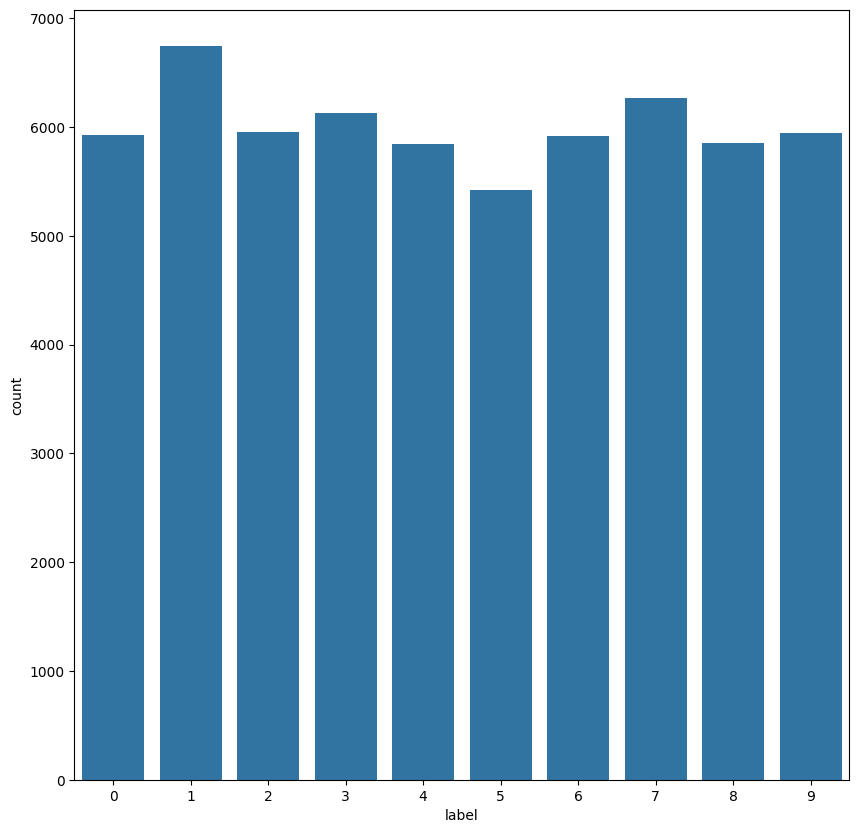

[0 0 0 0 1 0 0 0 0 0]


Epoch 1/10
375/375 [==============================] - 16s 41ms/step - loss: 0.4737 - accuracy: 0.8517 - val_loss: 0.1442 - val_accuracy: 0.9583
Epoch 2/10
375/375 [==============================] - 14s 39ms/step - loss: 0.1249 - accuracy: 0.9626 - val_loss: 0.1003 - val_accuracy: 0.9707
Epoch 3/10
375/375 [==============================] - 14s 38ms/step - loss: 0.0898 - accuracy: 0.9722 - val_loss: 0.0730 - val_accuracy: 0.9777
Epoch 4/10
375/375 [==============================] - 14s 38ms/step - loss: 0.0706 - accuracy: 0.9790 - val_loss: 0.0713 - val_accuracy: 0.9784
Epoch 5/10
375/375 [==============================] - 14s 38ms/step - loss: 0.0617 - accuracy: 0.9813 - val_loss: 0.0595 - val_accuracy: 0.9820
Epoch 6/10
375/375 [==============================] - 14s 38ms/step - loss: 0.0484 - accuracy: 0.9855 - val_loss: 0.0555 - val_accuracy: 0.9826
Epoch 7/10
375/375 [==============================] - 14s 38ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0557 - val_accuracy:

  saving_api.save_model(



None
Model saved as mnist_cnn_model.h5


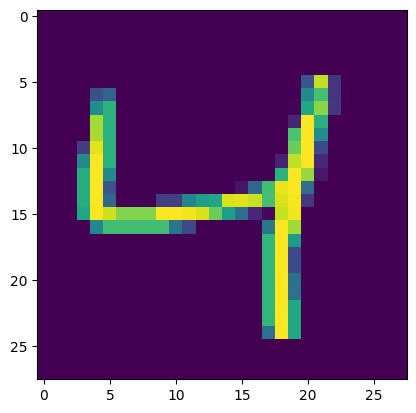

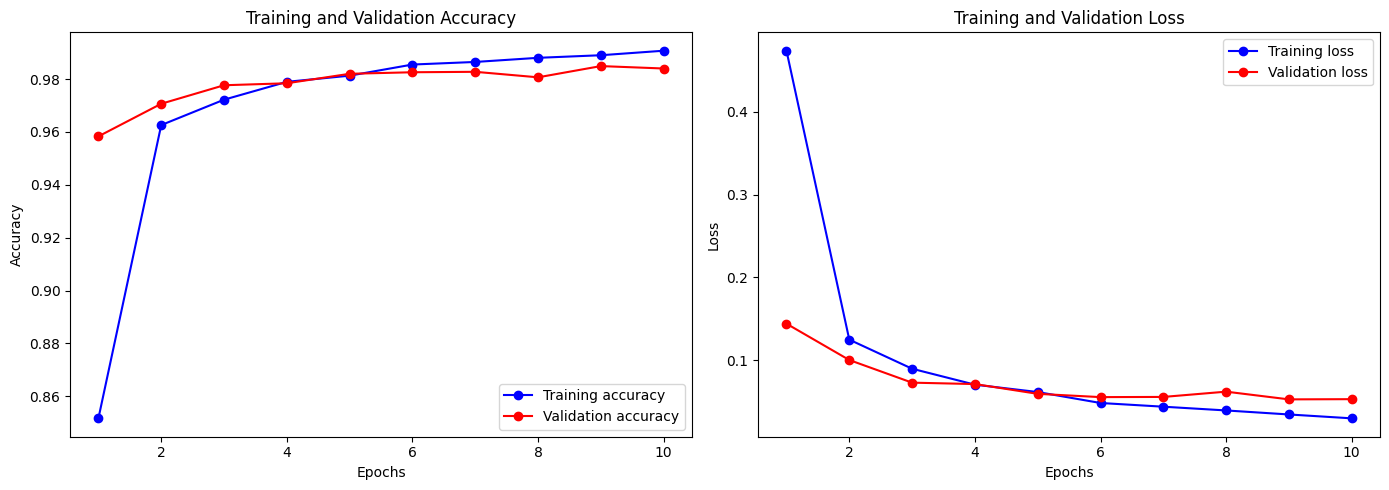

313/313 [==============================] - 1s 4ms/step
Accuracy on unseen data: 0.9853
Predicted Label: 9


True Label: 9


Predicted Label: 7


True Label: 7


Predicted Label: 0


True Label: 0


1/1 [==============================] - 0s 18ms/step


KeyboardInterrupt: 

: 

In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from gtts import gTTS
import IPython.display as ipd
import time
import random

# Load csv files
train = pd.read_csv('/Users/kangkanpatowary/Desktop/project/mnist_train.csv')
test = pd.read_csv('/Users/kangkanpatowary/Desktop/project/mnist_test.csv')

# Display the first few rows of the training data
train.head()

labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

# Plot the distribution of labels
plt.figure(figsize=(10, 10))
sns.countplot(x='label', data=train)
plt.show()

labels = train['label'].values
train.drop('label', axis=1, inplace=True)
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

index = 2
print(labels[index])
plt.imshow(images[index].reshape(28, 28))

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow('Sample Image', sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

x_train = X_train / 255.0
x_test = X_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

batch_size = 128
num_classes = 10
epochs = 10

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.20),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

print(model.summary())

model.save('mnist_cnn_model.h5')
print("Model saved as mnist_cnn_model.h5")

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

X_unseen = test.drop('label', axis=1).values
y_unseen = test['label'].values
x_test_unseen = X_unseen / 255.0
x_test_unseen = x_test_unseen.reshape(x_test_unseen.shape[0], 28, 28, 1)

test_labels_binarized = label_binarizer.transform(y_unseen)

y_pred = model.predict(x_test_unseen)
y_pred_labels = np.argmax(y_pred, axis=1)
test_labels_int = np.argmax(test_labels_binarized, axis=1)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_labels_int, y_pred_labels)
print(f"Accuracy on unseen data: {accuracy}")

def speak(y_pred_labels, y_valid, labels):
    elements = random.sample(range(len(y_pred_labels)), 3)
    pred_labels = [y_pred_labels[idx] for idx in elements]
    true_labels = [y_valid[idx] for idx in elements]

    for i, (pred_label, true_label) in enumerate(zip(pred_labels, true_labels)):
        pred_label_text = labels[pred_label]
        true_label_text = labels[true_label]

        pred_text = f"Predicted Label: {pred_label_text}"
        pred_speech = gTTS(text=pred_text, lang="en", slow=False)
        pred_speech_file = f"predicted_label_{i}.mp3"
        pred_speech.save(pred_speech_file)
        print(pred_text)
        ipd.display(ipd.Audio(pred_speech_file, autoplay=True))
        time.sleep(5)

        true_text = f"True Label: {true_label_text}"
        true_speech = gTTS(text=true_text, lang="en", slow=False)
        true_speech_file = f"true_label_{i}.mp3"
        true_speech.save(true_speech_file)
        print(true_text)
        ipd.display(ipd.Audio(true_speech_file, autoplay=True))
        time.sleep(5)

        os.remove(pred_speech_file)
        os.remove(true_speech_file)

labels = [str(i) for i in range(10)]
speak(y_pred_labels, test_labels_int, labels)

def getLetter(result):
    classLabels = {
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
        5: 'F',
        6: 'G',
        7: 'H',
        8: 'I'
    }
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

    roi = roi.reshape(1, 28, 28, 1)

    # Use model.predict followed by np.argmax
    result = str(np.argmax(model.predict(roi), axis=-1)[0])
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()


In [46]:
from moviepy.editor import ImageSequenceClip, AudioFileClip, concatenate_videoclips
from gtts import gTTS


def create_video_summary(images, predictions, output_path='mnist_video_summary.mp4'):
    clips = []
    for i, (image, prediction) in enumerate(zip(images, predictions)):

        image_uint8 = (image * 255).astype(np.uint8)
        img = cv2.resize(image_uint8.reshape(28, 28), (280, 280))
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)


        img_path = f'temp_img_{i}.png'
        cv2.imwrite(img_path, img)


        pred_text = f'The predicted digit is {prediction}'
        tts = gTTS(text=pred_text, lang='en')
        audio_path = f'temp_audio_{i}.mp3'
        tts.save(audio_path)


        img_clip = ImageSequenceClip([img_path], fps=1)
        audio_clip = AudioFileClip(audio_path)
        img_clip = img_clip.set_audio(audio_clip).set_duration(audio_clip.duration)

        clips.append(img_clip)


    final_clip = concatenate_videoclips(clips)


    final_clip.write_videofile(output_path, fps=1)

# Example usage
test_images = [x_test[i] for i in range(5)]  # Select some test images
predictions = [labels[y_pred_labels[i]] for i in range(5)]  # Get predictions for those images

# Create the video summary
create_video_summary(test_images, predictions)

Moviepy - Building video mnist_video_summary.mp4.
MoviePy - Writing audio in mnist_video_summaryTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video mnist_video_summary.mp4



Moviepy - Done !
Moviepy - video ready mnist_video_summary.mp4
